In [12]:
from sklearn.decomposition import PCA
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

log_folder = Path('../Field Cut Data/log_files/lookup.log')
cut_folder = Path('../Field Cut Data/cut_files' )
features = np.genfromtxt(log_folder, skip_header=1,dtype = np.float32)
features = features[:,1:4]

In [18]:
file_to_open = cut_folder / "0.cut"
data = np.genfromtxt(file_to_open, skip_header=2,dtype = np.float32).T.reshape(4,1001,1)

for i in range(0,2499):
    file_to_open = cut_folder / (str(i)+'.cut')
    openFileData = np.genfromtxt(file_to_open, skip_header=2,dtype = np.float32).T.reshape(4,1001,1)
    data = np.append(data,openFileData,axis = 2)

In [27]:

from sklearn.preprocessing import StandardScaler


features = StandardScaler().fit_transform(features)
print(features)


print(data.shape)
print(features.shape)
redata = data.reshape(2500,4,1001)
#print(StandardScaler().fit_transform(redata))

[[-1.6641005 -1.5666988 -1.5666989]
 [-1.6641005 -1.2185435 -1.5666989]
 [-1.6641005 -0.8703882 -1.5666989]
 ...
 [ 1.6641006  0.8703883  1.5666989]
 [ 1.6641006  1.2185436  1.5666989]
 [ 1.6641006  1.5666989  1.5666989]]
(4, 1001, 2500)
(2500, 3)


[0.33333337 0.3333333  0.3333333 ]


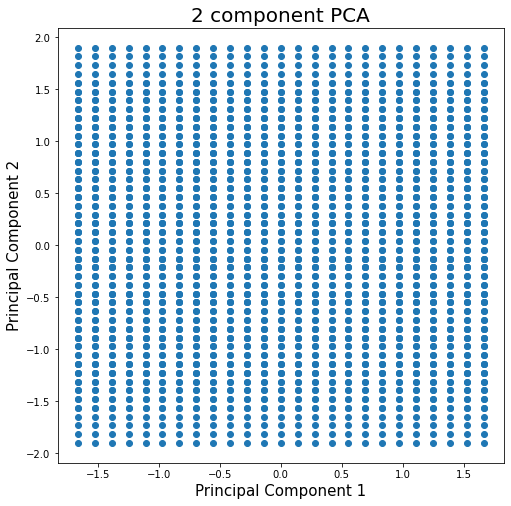

In [28]:


pca = PCA(n_components=3)
principalComponents = pca.fit_transform(features)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalComponents[:,0],principalComponents[:,1])
print(pca.explained_variance_ratio_)